# Задача 1. Минимизация гладкой функции

1) Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]
2) В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
3) Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
4) Изучите примеры использования  scipy.optimize.minimize в документации Scipy (см. "Материалы")
5) Попробуйте найти минимум, используя стандартные параметры в функции  scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). 6) Попробуйте менять начальное приближение и изучить, меняется ли результат. 
6) Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.
7) Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.
8) Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

In [3]:
import numpy as np
import scipy as sc
from scipy.spatial import distance
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Решение 
1) Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]
2) В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
3) Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.

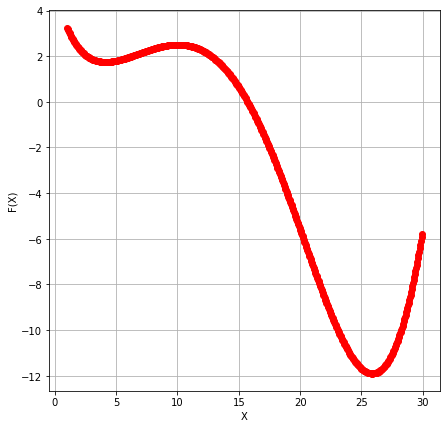

In [60]:
def function_exp(x):
    f_x = np.sin(x/5.0)*np.exp(x/10.0) + 5.0*np.exp(-x/2.0) 
    return f_x
#plot grafic function 
x_ideal = list(np.arange(1.0, 30.0, 0.05))
y_ideal = []
#y1 = []
for p in range(len(x_ideal)):
    y_ideal.append(function_exp(x_ideal[p]))
    #y1.append(function_w1(x_ideal[p]))
plt.figure(figsize=(7, 7))
plt.plot(x_ideal, y_ideal,'ro')
#plt.plot(x_ideal, y1,'g-')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.grid()
plt.show()

# Решение:
4) Изучите примеры использования  scipy.optimize.minimize в документации Scipy (см. "Материалы")
5) Попробуйте найти минимум, используя стандартные параметры в функции  scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). 6) Попробуйте менять начальное приближение и изучить, меняется ли результат. 
6) Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.
7) Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [72]:
rez_std = minimize(function_exp, 2, method = 'BFGS')
rez_std_2 = minimize(function_exp, 30, method = 'BFGS')
print(rez_std)
print(rez_std_2)

      fun: 1.7452682903447336
 hess_inv: array([[5.98752645]])
      jac: array([-2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627628])
      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])


In [112]:
# create file
file_submission_1 = open("submission-21.txt", "w+") 
stroka = str(np.round(rez_std.fun, 2)) + ' ' + str(np.round(rez_std_2.fun, 2))
print(stroka)
file_submission_1.write(stroka)
file_submission_1.close()

1.75 -11.9


# Задача 2. Глобальная оптимизация

1) Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.
2) Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
3) Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
4) Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
5) Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
6) Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [104]:
from scipy.optimize import differential_evolution
x0 = [(1.0, 30.0)]
rez_dm = differential_evolution(function_exp, x0)
print(rez_dm)

     fun: array([-11.89889467])
     jac: array([2.13162803e-06])
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 4
 success: True
       x: array([25.88019636])


In [116]:
file_submission_2 = open("submission-22.txt", "w+") 
stroka_2 = str(np.round(rez_dm.fun[0], 2))
print(stroka_2)
file_submission_2.write(stroka_2)
file_submission_2.close()

-11.9
